# K-Means Clustering
K-Means Clustering is an unsupervised learning algorithm that is used to group unlabelled data into clusters. Since we have no labels to describe the data, this model is used to learn underlying patterns in data by trying to fit them into cluster. Each cluster tends to contain data that are similar to each other, and data from one cluster tend to be less similar to data from another cluster. How many clusters we want to learn is the value of `k` we determine while building the model.

Learning to fit data into clusters is an iterative process. We start by choosing `k` random points as the center of clusters, and assign each data point to the cluster for which its distance to the center of cluster is the nearest. Next, we update the centers of each cluster based on mean of all the data points that belong to the cluster, and repeat the process by updating the membership of points to the clusters until the centers do not change upon further iteration.

[K-Means Clustering Visualization](http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html)

Now, let us implement it in scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = 8, 6
plt.style.use('ggplot')

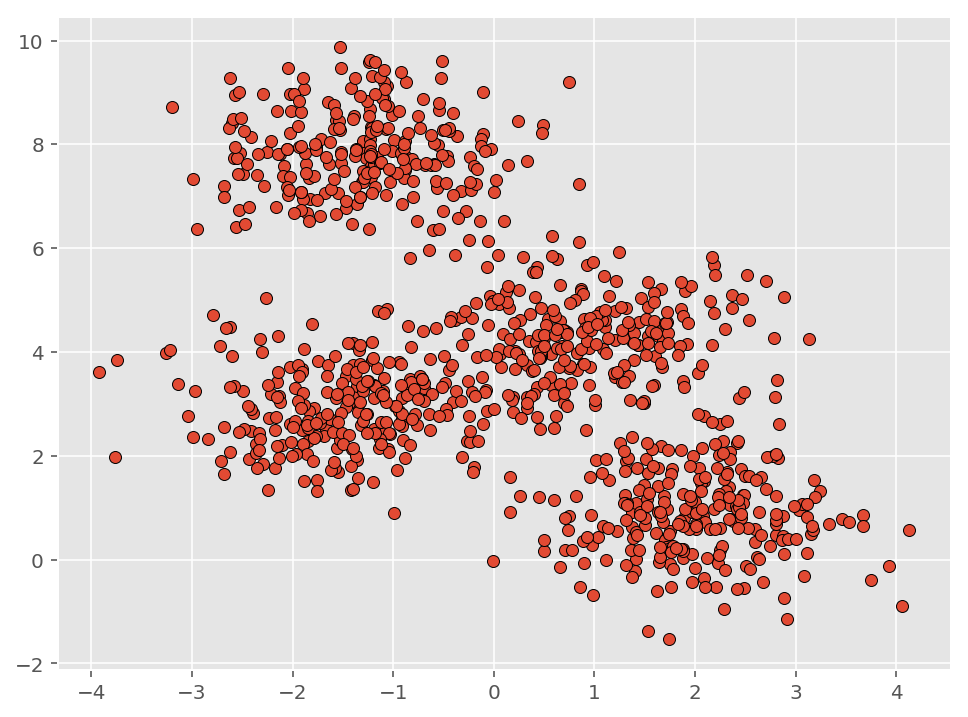

In [3]:
X, _ = make_blobs(n_samples=1000, centers=4, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], edgecolors='k')

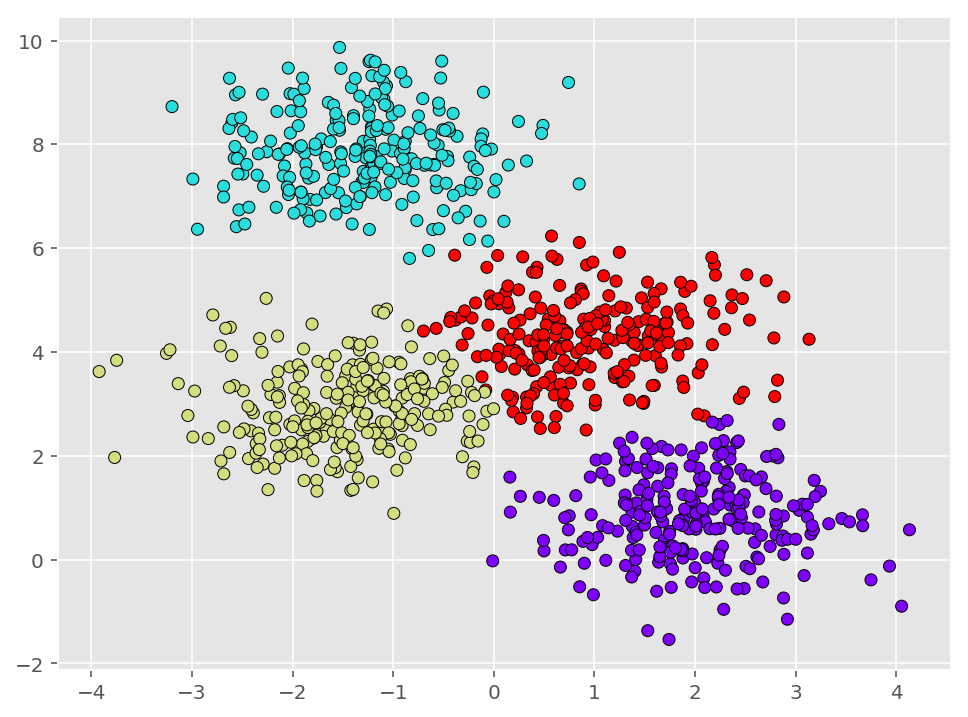

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='rainbow', edgecolors='k')

# Principal Component Analysis (PCA)
Principal Component Analysis is an unsupervised learning algorithm that is most fundamentally used for dimensionality reduction. However, it has useful applications in domains like visualization, feature extraction, data compression and noise filtering.

As we have been seeing in various datasets, each data is represented as a feature vector that has multiple elements. Each element represents a component of a point in multi-dimensional space. This means that each column of our dataset is a dimension that forms a multi-dimensional space, and each data forms a point in this space. Thus, all data points together form a point cloud in *n-dimensional space* where *n* is the number of features.

In this context, when we say *dimensionality reduction*, it means that we are trying to reduce the number of features from data. But, obviously, when we throw away some columns or features from data, we're losing some information about the data that might be useful. This is where PCA comes into play. PCA helps us to reduce the number of dimensions by identifying which dimension carries  more information and which carries less information. Once we identify less important dimensions, we can throw them away to reduce dimensions from our data. However, it is important to note that *this dimension* that PCA helps us identify may be a combination of one or more features of our data.

In mathematical terms, principal component analysis decomposes the data into new dimensions (the number of new dimensions is same as that of our data) in order of highest to lowest variance. These new dimensions are known as *principal components*. The first principal component is the axis/dimension that has the highest variation (or carries maximum information) and so on. Thus, if we want to reduce the dimensions in the data, we can throw away the principal components that has the least variance. Mathematically, these principal components are actually the *eigenvectors* of the covariance matrix of our data, and the variance of each component is the respective *eigenvalue*.

Let us get more sense of it by looking at some examples.

## Dimensionality Reduction
First, we'll see how PCA is used for dimensionality reduction.

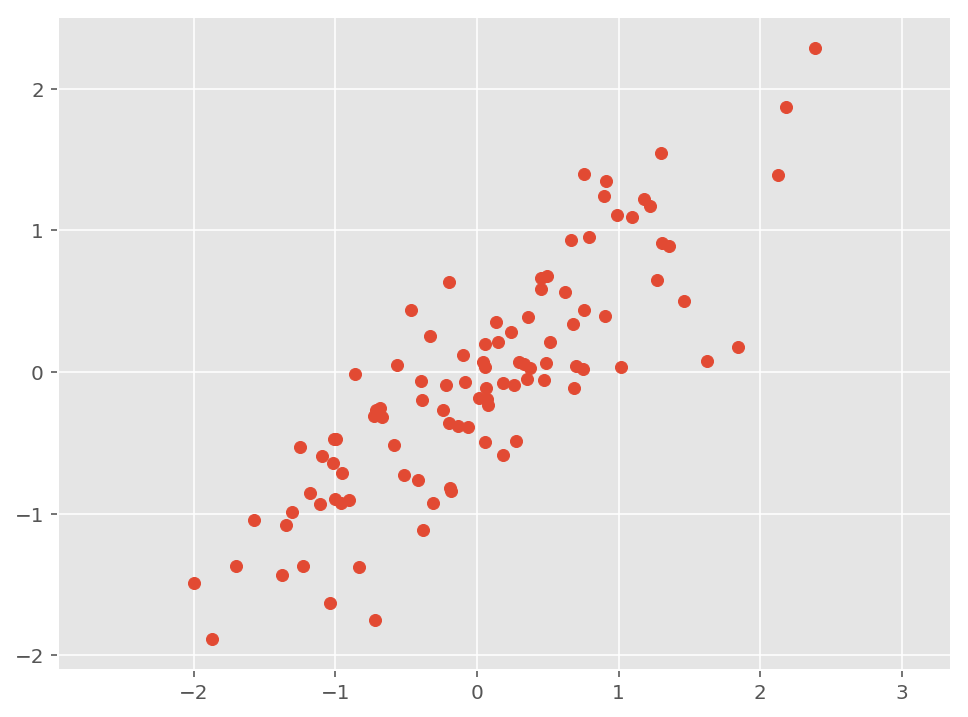

In [7]:
np.random.seed(42)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 100)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

The PCA has now computed the principal components of the data and variances along these components.

In [9]:
pca.components_

array([[ 0.75710263,  0.65329596],
       [ 0.65329596, -0.75710263]])

In [10]:
pca.explained_variance_

array([1.40229073, 0.11393355])

Let's visualize these components.

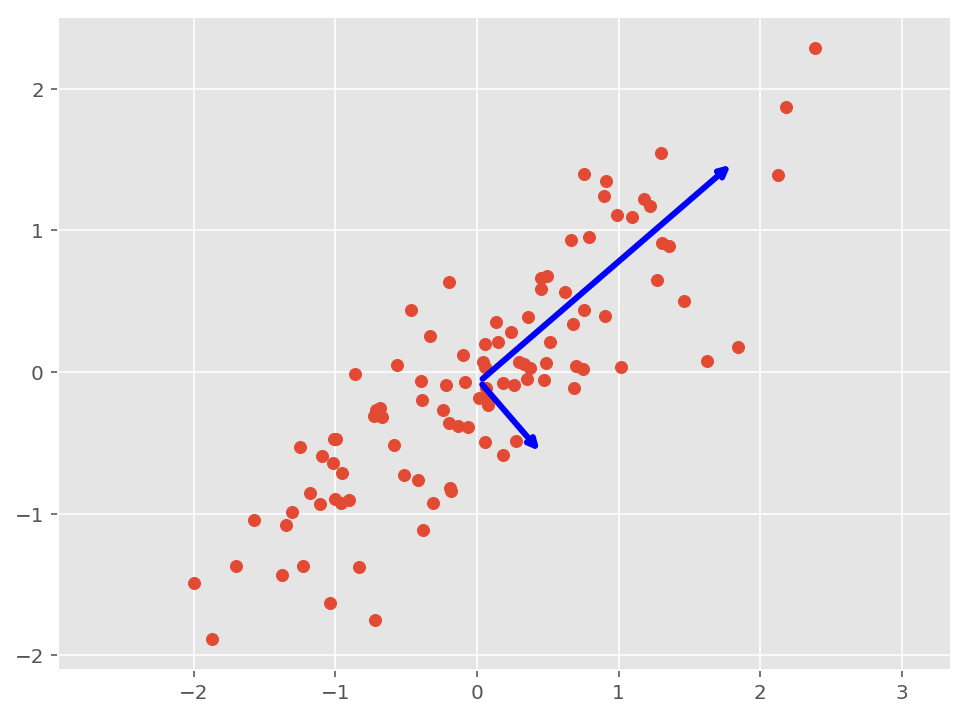

In [11]:
# draw principal components over scatter plot
plt.scatter(X[:,0], X[:,1])
arr=dict(arrowstyle='->', linewidth=3, color='b')
plt.annotate('', pca.mean_ + 2*(pca.explained_variance_[0]**0.5)*pca.components_[0], pca.mean_, arrowprops=arr)
plt.annotate('', pca.mean_ + 2*(pca.explained_variance_[1]**0.5)*pca.components_[1], pca.mean_, arrowprops=arr)
plt.axis('equal')
plt.show()

Note that the longer vector indicates the component with larger variance, and shorter vector indicates the component with smaller variance. Now, we can reduce the dimension of this data by removing the component with smaller variance i.e projecting the data to the component with larger variance.

In [12]:
# Reduce 2-dimensional data to 1-dimensional
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('Old Shape: {}, New Shape: {}'.format(X.shape, X_pca.shape))

Old Shape: (100, 2), New Shape: (100, 1)


Now, we'll try to reconstruct our data form dimension-reduced data.

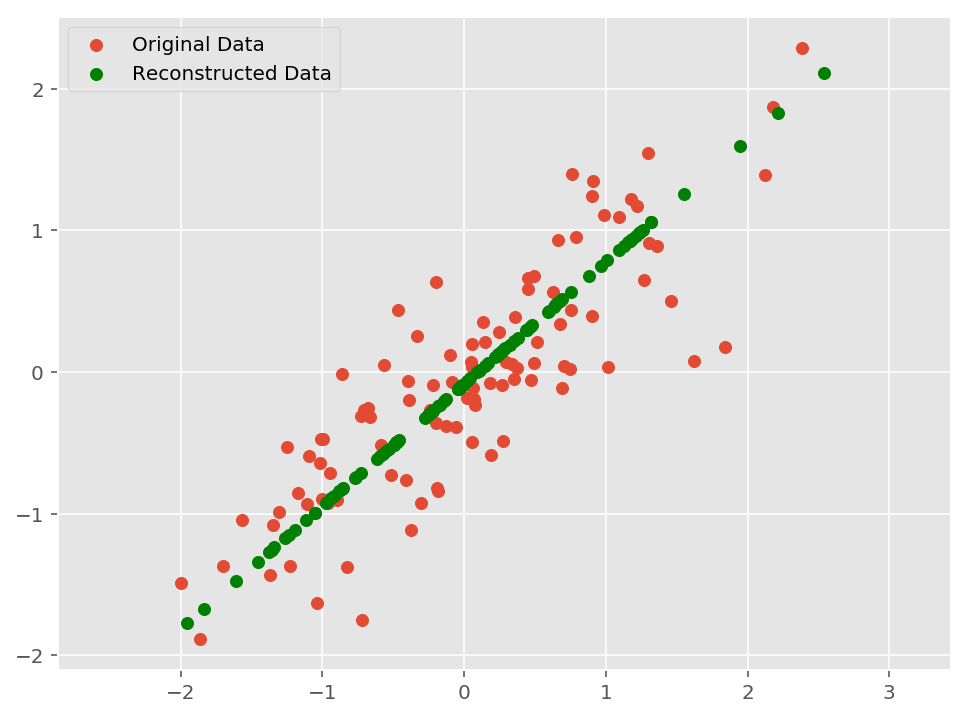

In [13]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], label='Original Data')
plt.scatter(X_new[:, 0], X_new[:, 1], color='g', label='Reconstructed Data')
plt.axis('equal')
plt.legend()
plt.show()

## Visualizing High Dimensional Data
Since PCA can be used to reduce dimensions in data, we can use this technique to reduce high dimensional data to 2-dimensional data (or 3d) and vizualize it. To explore this, we'll work with MNIST handwritten digits dataset we came across in previous class. It contains 28x28 resolution images i.e. 784 dimensional features, and try to visualize them in 2D plots.

In [14]:
from sklearn.model_selection import train_test_split
mnist = pd.read_csv('../resources/mnist.csv')
features = mnist.drop('label', axis=1).values
labels = mnist['label'].values

In [15]:
# We'll use only 10% of data for visualization
X, _, y, _ = train_test_split(features, labels, stratify=labels, test_size=0.9, random_state=10)

In [16]:
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
X_new.shape

(4200, 2)

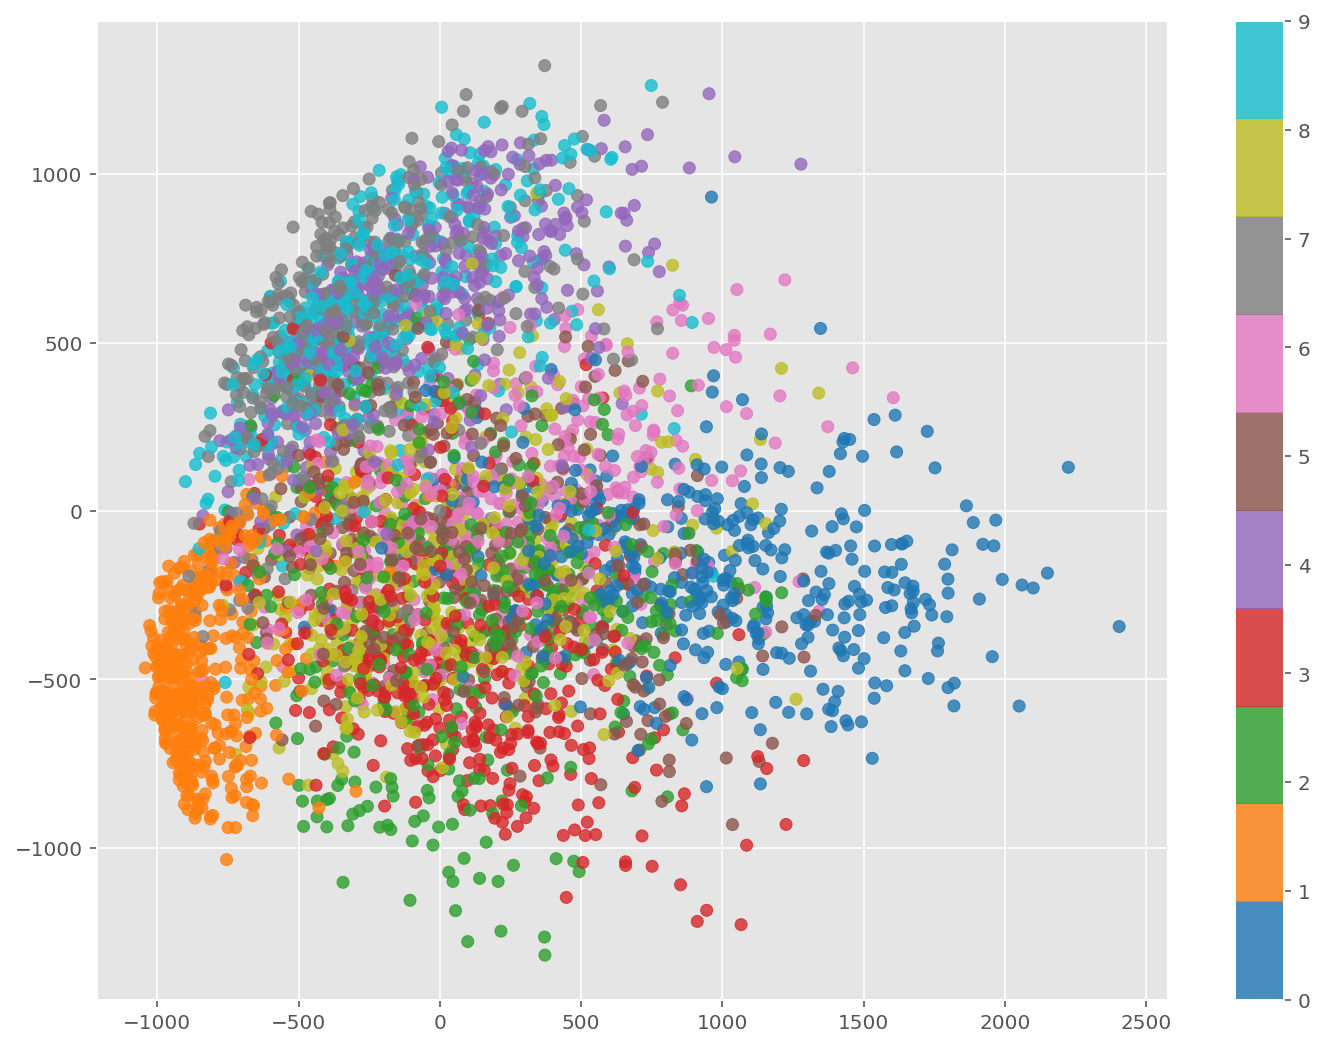

In [17]:
plt.figure(figsize=(12, 9))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap='tab10', alpha=0.8)
plt.colorbar()

Let us also try this with iris dataset.

In [18]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


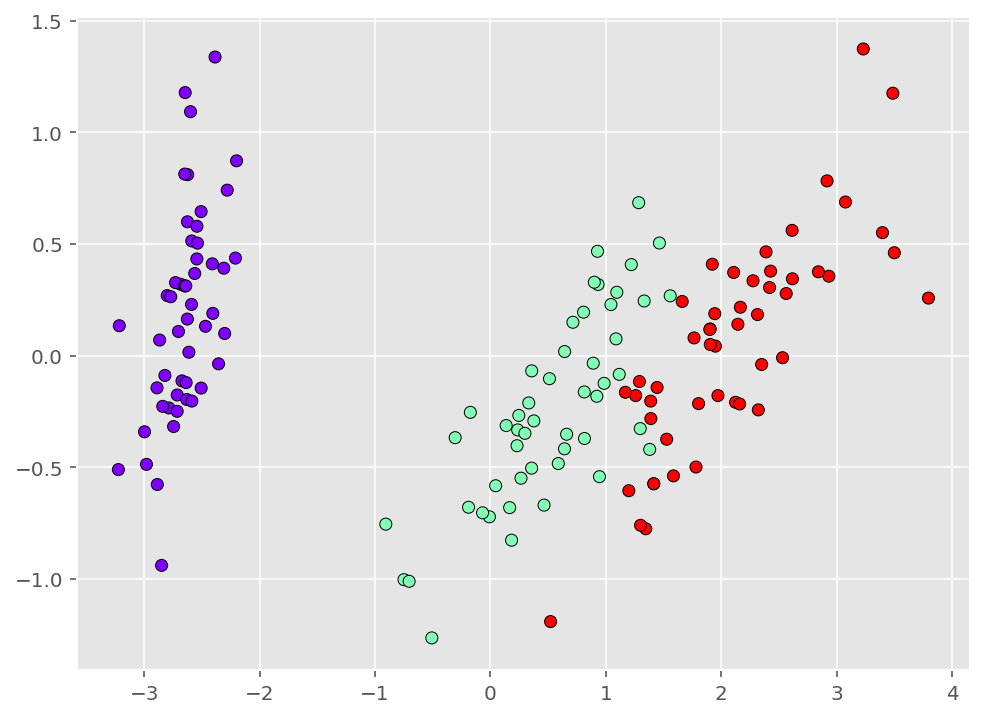

In [19]:
X = iris.drop('species', axis=1)
y, labels = iris['species'].factorize()  # converts catagorical to numeric values
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap='rainbow', edgecolors='k')

# Final Project
Explore datasets available in [Kaggle](https://kaggle.com/datasets) and choose any relevant dataset with which you'll be doing the following tasks.
1. Propose a classification task with reference to the dataset.
2. Perform exploratory data analysis on the dataset to understand more about the data.
3. Implement at least two classification algorithms, experiment with them to build one best model for each algorithm, and compare the final results.
4. Prepare a complete documentation of everything you've done.
5. Deliver a final presentation of your work.

---

<p style="text-align: center">** End of Course **</p>

---



# Resources for Further Learning
- [Machine Learning Course on Coursera](https://www.coursera.org/learn/machine-learning): Taught by Andrew Ng, this free course explores machine learning from algorithmic perspective. Knowledge of basic undergraduate level mathematics (mostly calculus and linear algebra) and programming is assumed, but not mandatory. This is one of the most popular introductory courses in machine learning, and I highly recommend it.

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook): Available online for free, this book introduces the core libraries essential for working with data in Python: particularly IPython, NumPy, Pandas, Matplotlib, Scikit-Learn, and related packages. This book has been a key reference for designing the materials in our course, and is also available as Jupyter notebooks on [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks).

- [*3blue1brown* YouTube Channel](https://www.youtube.com/c/3blue1brown): One of my favorite channels on YouTube, *3blue1brown* makes use of video animations to explain mathematical concepts in a way that is astoundingly beautiful and comprehensible. There is a series on [Calculus](https://www.youtube.com/playlist?list=PLZHQObOWTQDMsr9K-rj53DwVRMYO3t5Yr), and another on [Linear Algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) that you might find useful since they are fundamental concepts for machine learning. There is also a series on [Neural Networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) if you are curious.

- [Kaggle](https://www.kaggle.com/): A great place to explore data science projects and competitions.

- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php): It hosts hundreds of datasets useful for machine learning tasks.

- [Google Dataset Search](https://toolbox.google.com/datasetsearch): Currently in beta, this tool is very useful to search datasets across the web.
